In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
#Load your dataset
df = pd.read_csv("../../0_DataPreparation/initialdata/merged_data_temperature+holidays+weather_impression.csv")

#Ensure the 'Datum' column is in datetime format
df['Datum'] = pd.to_datetime(df['Datum'])

#Define time ranges
train_start = '2013-07-01'
train_end = '2017-07-31'
val_start = '2017-08-01'
val_end = '2018-07-31'
test_start = '2018-08-01'
test_end = '2019-07-30'

#Split data
train_data = df[(df['Datum'] >= train_start) & (df['Datum'] <= train_end)]
validation_data = df[(df['Datum'] >= val_start) & (df['Datum'] <= val_end)]
test_data = df[(df['Datum'] >= test_start) & (df['Datum'] <= test_end)]

#Optional: print shapes
print("Train shape:", train_data.shape)
print("Validation shape:", validation_data.shape)
print("Test shape:", test_data.shape)

Train shape: (7517, 14)
Validation shape: (1839, 14)
Test shape: (351, 14)


In [15]:
df.head()

Datum    Weekday  Bewoelkung  Temperatur  Windgeschwindigkeit  \
0 2012-01-01     Sunday         8.0        9.82                   14   
1 2012-01-02     Monday         7.0        7.44                   12   
2 2012-01-03    Tuesday         8.0        5.54                   18   
3 2012-01-04  Wednesday         4.0        5.69                   19   
4 2012-01-05   Thursday         6.0        5.30                   23   

   Wettercode  id Warengruppe  Umsatz  KielerWoche Weather_Category  \
0        58.0 NaN         NaN     NaN          NaN             Rain   
1         NaN NaN         NaN     NaN          NaN          Unknown   
2        63.0 NaN         NaN     NaN          NaN             Rain   
3        80.0 NaN         NaN     NaN          NaN             Rain   
4        80.0 NaN         NaN     NaN          NaN             Rain   

  Weather_Category_Wind_Adjusted  Wind_Downgrade_Count  
0                           Rain                     0  
1                        Unknown                     0  
2                           Rain                     0  
3                           Rain                     0  
4                           Rain                     0

In [16]:
columns = train_data.columns.tolist()
columns

['Datum',
 'Weekday',
 'Bewoelkung',
 'Temperatur',
 'Windgeschwindigkeit',
 'Wettercode',
 'id',
 'Warengruppe',
 'Umsatz',
 'KielerWoche',
 'Weather_Category',
 'Weather_Category_Wind_Adjusted',
 'Wind_Downgrade_Count']

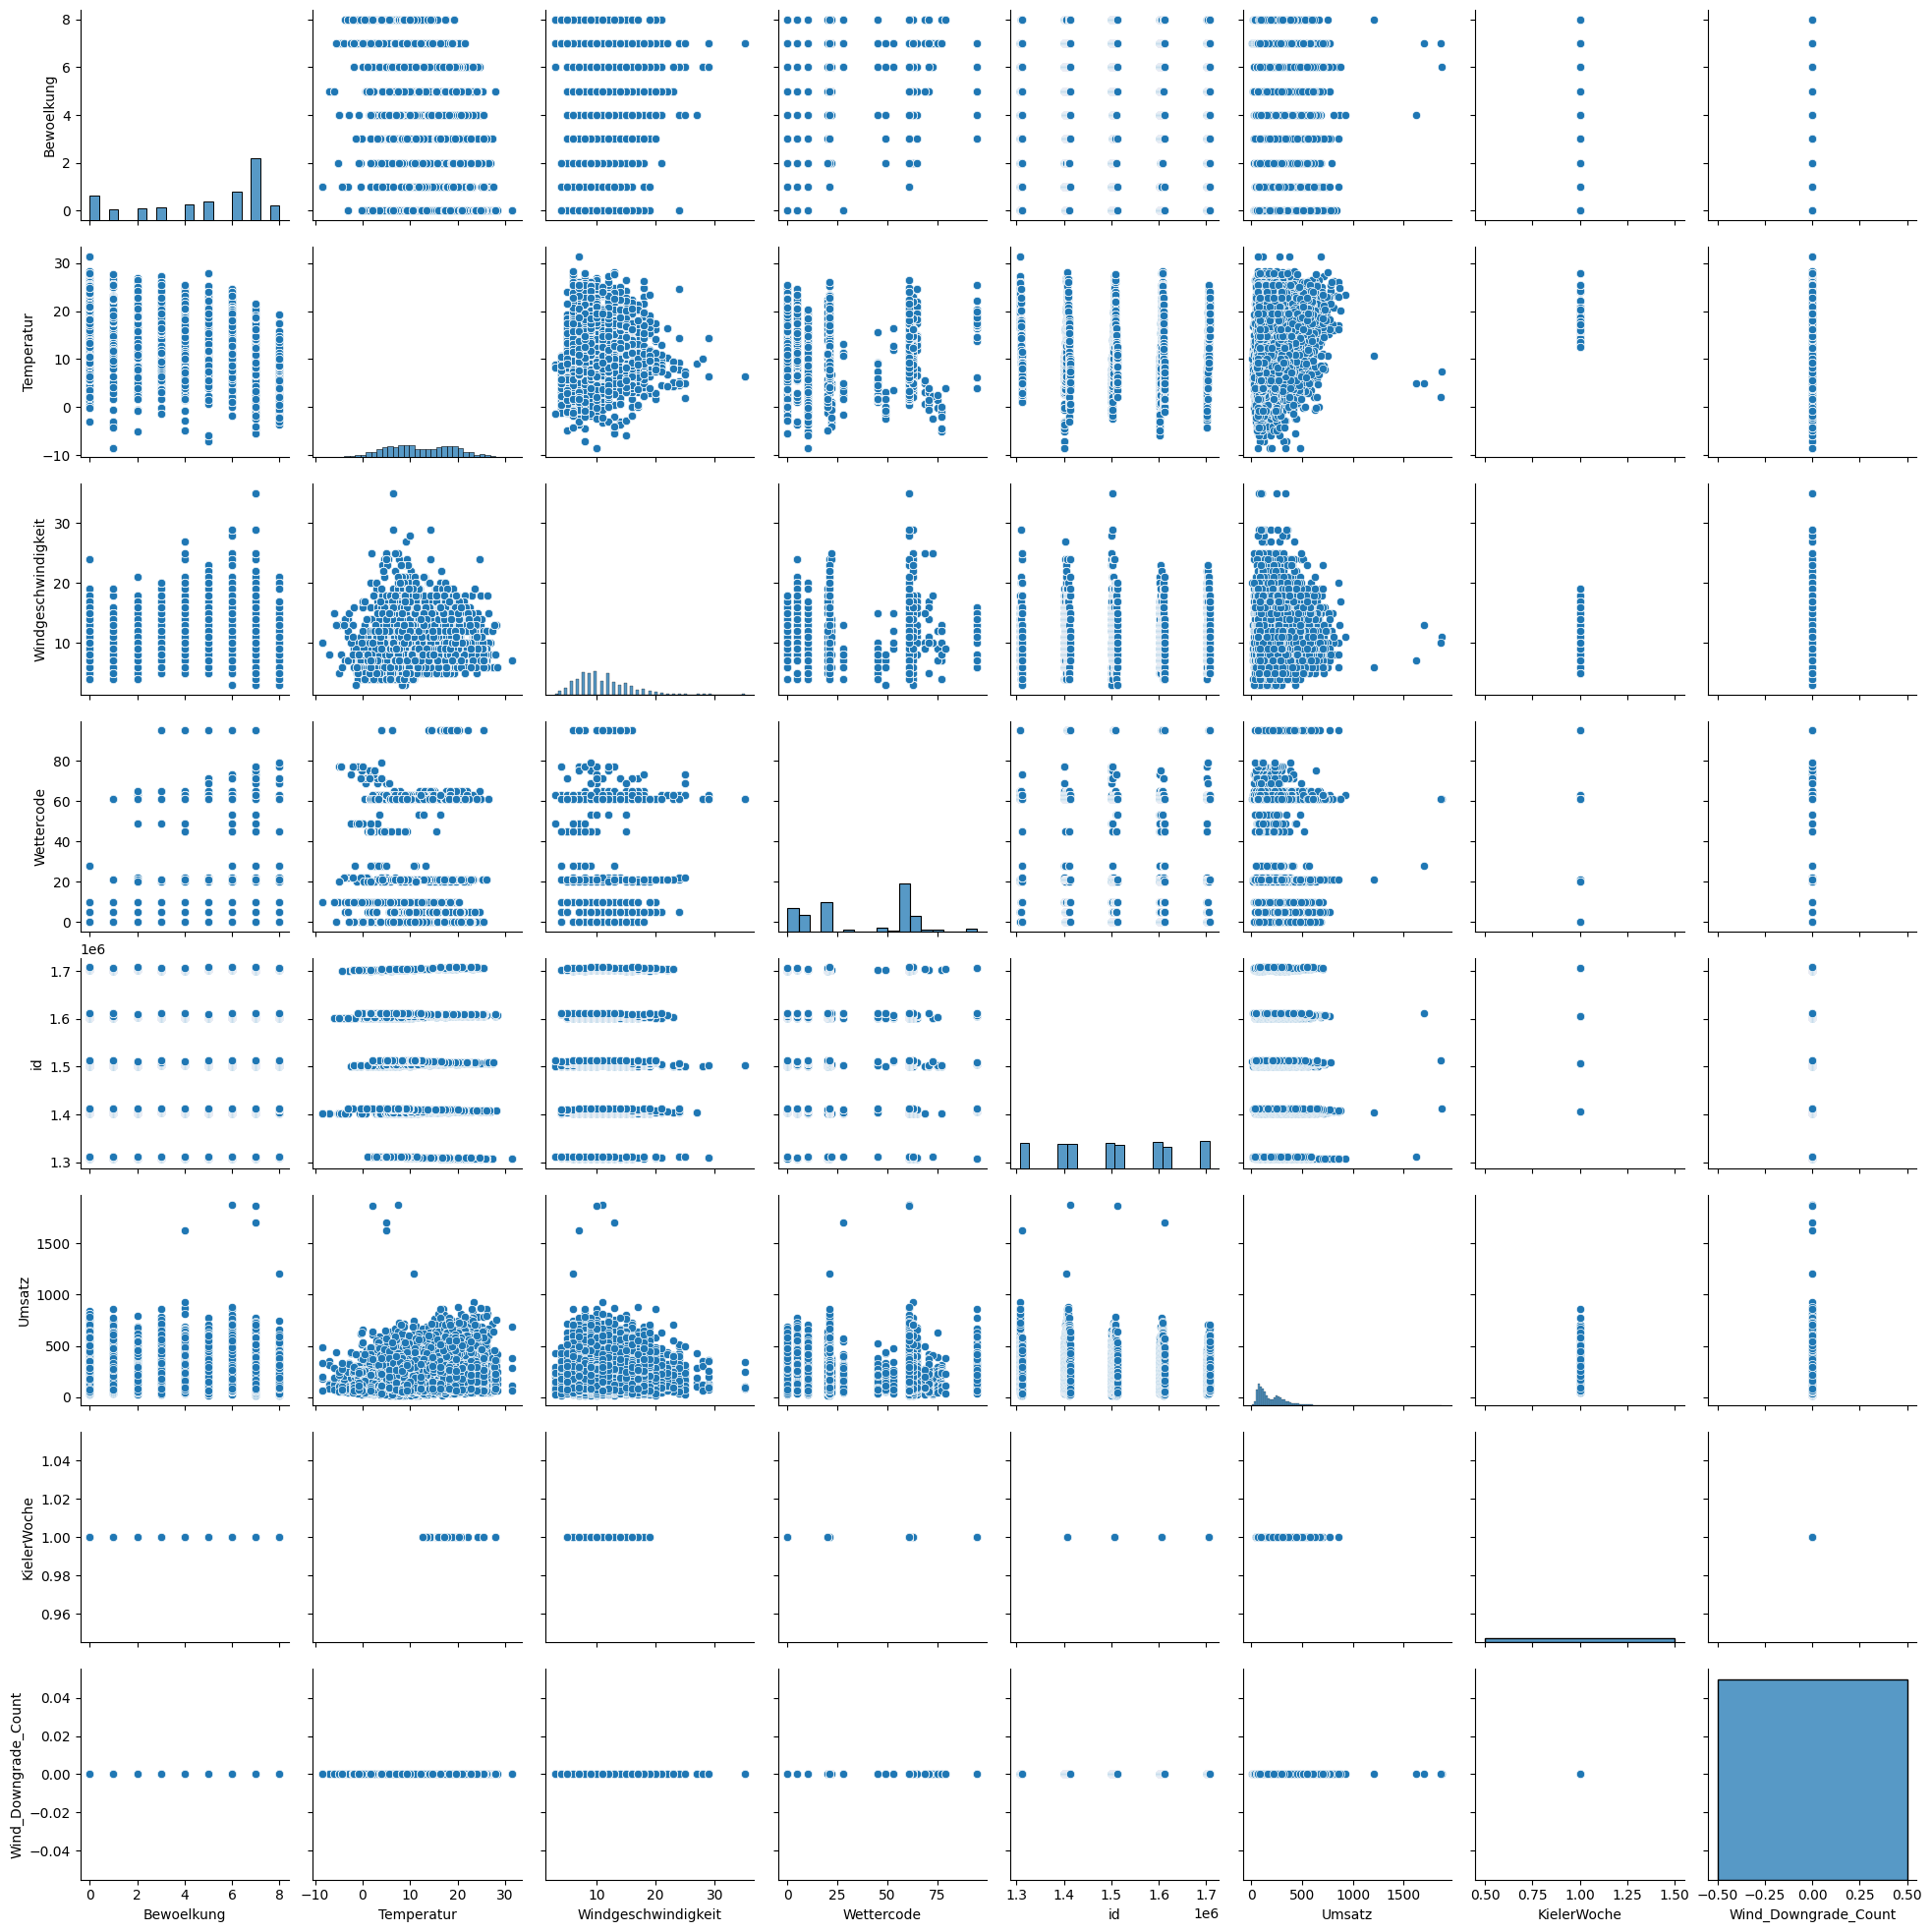

In [17]:
sns.pairplot(train_data[columns])

In [18]:
#remove all non-numeric columns for correlation
columns = [col for col in columns if train_data[col].dtype in ['float64', 'int64']]
train_data[columns].corr()

Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  \
Bewoelkung              1.000000   -0.376459             0.042912    0.478444   
Temperatur             -0.376459    1.000000             0.003471    0.011623   
Windgeschwindigkeit     0.042912    0.003471             1.000000    0.127076   
Wettercode              0.478444    0.011623             0.127076    1.000000   
id                      0.041113   -0.095729             0.027233   -0.053262   
Umsatz                 -0.085921    0.216570             0.011454    0.001147   
KielerWoche                  NaN         NaN                  NaN         NaN   
Wind_Downgrade_Count         NaN         NaN                  NaN         NaN   

                            id    Umsatz  KielerWoche  Wind_Downgrade_Count  
Bewoelkung            0.041113 -0.085921          NaN                   NaN  
Temperatur           -0.095729  0.216570          NaN                   NaN  
Windgeschwindigkeit   0.027233  0.011454          NaN                   NaN  
Wettercode           -0.053262  0.001147          NaN                   NaN  
id                    1.000000 -0.097429          NaN                   NaN  
Umsatz               -0.097429  1.000000          NaN                   NaN  
KielerWoche                NaN       NaN          NaN                   NaN  
Wind_Downgrade_Count       NaN       NaN          NaN                   NaN

In [19]:
print(train_data['Warengruppe'])

394           Brot
395       Brötchen
396      Croissant
397     Konditorei
398         Kuchen
           ...    
7906          Brot
7907      Brötchen
7908     Croissant
7909    Konditorei
7910        Kuchen
Name: Warengruppe, Length: 7517, dtype: object


In [ ]:
# linear regression model Umsatz ~ Warengruppe
Y = train_data['Umsatz']
X = sm.add_constant(pd.get_dummies(train_data['Warengruppe'], drop_first=True, dtype=int))
X.head()

# Drop rows where either X or Y is NaN
valid_idx = Y.notna() & X.notna().all(axis=1)
Y_clean = Y[valid_idx]
X_clean = X[valid_idx]

model = sm.OLS(Y_clean, X_clean)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2783.
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        12:47:33   Log-Likelihood:                -44092.
No. Observations:                7487   AIC:                         8.820e+04
Df Residuals:                    7481   BIC:                         8.824e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.3782      2.287     53.079      0.0

In [1]:
import pandas as pd
import statsmodels.api as sm

# 1. Load test data (make sure the file 'test.csv' is in the same folder)
test_data = pd.read_csv("test.csv")

# 2. Map numeric codes in 'Warengruppe' to category names to match training data
mapping = {
    1: 'Brot',
    2: 'Brötchen',
    3: 'Croissant',
    4: 'Konditorei',
    5: 'Kuchen',
    6: 'Saisonbrot'
}
test_data['Warengruppe'] = test_data['Warengruppe'].map(mapping)

# 3. Create dummy variables for 'Warengruppe'
X_test = pd.get_dummies(test_data['Warengruppe'], drop_first=True, dtype=int)
X_test = sm.add_constant(X_test)  # Add constant column because the model has one

# 4. Add missing columns that were present in training but missing in test set
for col in X_clean.columns:
    if col not in X_test.columns:
        X_test[col] = 0

# 5. Reorder columns to match the order in training dataset
X_test = X_test[X_clean.columns]

# 6. Predict sales using your trained model
preds = results.predict(X_test)

# 7. Create submission file with original IDs from the test set
submission = pd.DataFrame({
    'id': test_data['id'],
    'Umsatz': preds
})

# 8. Save the submission as CSV without index as required by Kaggle
submission.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")



NameError: name 'X_clean' is not defined